# Import and Define Keras MNIST Classification Model, Convert to SAS Deep Learning MNIST Classification Model


You can use the SAS DLPy API to download and import a wide variety of pre-trained deep learning models. Access to a collection of pre-trained deep learning models is a good thing! Pre-trained deep neural networks represent significant savings in compute and development time, as well as enhancing developer productivity. 
 the
Numerous Keras model libraries exist on the web. Here is one example: (https://github.com/fchollet/keras-resources).

The following example code uses SAS DLPy to create a Keras model named `model0` that classifies gray-scale images of handwritten numeric digits from the [MNIST database](http://yann.lecun.com/exdb/mnist/). 

First, the example creates a Keras MNIST image classification model. Next, the example uses SAS DLPy utilities to convert the Keras model `model0` into a SAS Deep Learning model named `model1` that runs in the SAS Viya environment.

This example assumes that you have the SAS DLPy API installed, the Python Keras API installed, and that you have an active SAS CAS server. 

[Configure Python Utilities](#Configure_Python)

[Configure CAS and Import SWAT](#Configure_CAS)

[Define a MNIST Classification Model in Keras](#Define_MNIST)

[Convert Keras Model to SAS Deep Learning Mode](#Convert_Keras)


<a id='Configure_Python'></a>

### Configure Python Utilities 

This step calls the Python matplotlib module and configures it to display plotted outputs within the Jupyter notebook cells.

In [1]:
%matplotlib inline

<a id='Configure_CAS'></a>

### Configure SAS CAS and Import SWAT

The following code configures your SAS CAS session for deep learning tasks. 

First, import SWAT. SWAT is the SAS Scripting Wrapper for Analytics Transfer. SWAT is the Python interface to SAS CAS that enables you to load data into memory and apply CAS actions to the data.

<b>Note:</b> For more information about starting a CAS session with the SWAT package, see https://sassoftware.github.io/python-swat/getting-started.html.

In [2]:
import swat

host_name='your-qualified.server-name.com'

port_number='12345' # use a unique 5-digit port ID

s = swat.CAS('host_name', 'port_number')


# Required for DLPY prior to v1.2
s.loadactionset('deepLearn')

NOTE: Added action set 'deepLearn'.


[actionset]

 'deepLearn'

+ Elapsed: 0.00252s, user: 0.000629s, sys: 0.00188s, mem: 0.205mb

<a id='Define_MNIST'></a>

### Define a MNIST Classification Model in Keras

The following section creates a Keras model that performs a MNIST (Modified National Institute of Standards and Technology) classification task by identifying handwritten digits. The MNIST database consists of images of handwritten digits. The MNIST database is an open-source database that is used to train various machine learning models.

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


Now use the Keras `Sequential()` function to create a CNN network designed to classify images of MNIST digits. 

To define the CNN network, begin with the input layer. Use `add()` to specify a 2-D convolutional input layer that has 32 nodes, a kernel_size of (5, 5), and a stride of (1, 1). The Conv2-D layer uses the `relu` activation function. Image padding should be the `same` for top, right, bottom, and left sides of images. 
*Note:* The SAS DLPy API currently supports only `same` image padding. The Keras input shape defines the input image channels. 

The training data for this model consists of monochrome images (1 channel) that are 28 pixels tall and 28 pixels wide. Keras defines this input shape as (28, 28, 1). The 2-D convolutional input layer is paired with a 2-D max pooling layer of size (2, 2), and stride of (2, 2). The max pooling layer also utilizes `same` image padding. 

Then the convolution and pooling combo is repeated (with more filters in the second pair). After the convolution and pooling layers, two dense layers are added; one dense layer with 1,000 neurons, and the last dense layer which has 10 neurons, which corresponds with the total number of classes in the MNIST training and test data sets.

The following Keras code creates a sequential CNN model named `model0`, using the architectures described above:

In [4]:
model0 = Sequential()
model0.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',padding='same',
                 input_shape=(28,28,1)))
model0.add(MaxPooling2D(pool_size=(2, 2), padding='same', strides=(2, 2)))
model0.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model0.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model0.add(Flatten())
model0.add(Dense(1000, activation='relu'))
model0.add(Dense(10, activation='softmax'))

After creating `model0`, use the `summary()` function to generate a table that describes the `model0` layer types, output shapes, and number of parameters: 

In [5]:
model0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3137000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

The Keras model `model0` has 7 layers and approximately 3.2 million parameters.



<a id='Convert_Keras'></a>

### Convert Keras Model to SAS Deep Learning Model

Now convert the Keras model to a SAS DLPy model. Converting from a Keras model to a DLPy model enables all of the related DLPy deep learning model functions. Begin by importing the DLPy model function class:

In [6]:
from dlpy import Model

Now use the SAS DLPy `from_keras_model()` function to create the SAS Deep Learning model named `model1` from the Keras model named `model0`. The name assigned to the output_model_table variable is `converted_keras_model`.

In [7]:
model1,use_gpu = Model.from_keras_model(conn=s, 
                                        keras_model=model0, 
                                        output_model_table='converted_keras_model'
                                       )

NOTE: Model table is attached successfully!
NOTE: Model is named to "converted_keras_model" according to the model name in the table.


The SAS Deep Learning model `model1` has been created from the Keras model `model0`. Now the SAS Deep Learning model named `model1` can be used with all DLPy functions.

NOTE: You should not be concerned about the warning in the example output. In this case, it is expected, because the Keras model input layer did not have a name. The warning simply informs users that a name has been created for the Viya model input layer.

Now, use the DLPy `print_summary()` function to generate a table that shows model architecture by layer type, kernel size, stride, activation function, output size, and number of parameters: 

In [8]:
model1.print_summary()

,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,0,conv2d_1_input,input,,,None,"(28, 28, 1)","(0, 0)"
1,1,conv2d_1,convo,"(5, 5)","(1.0, 1.0)",Rectifier,"(28, 28, 32)","(800, 32)"
2,2,max_pooling2d_1,pool,"(2, 2)","(2.0, 2.0)",Max,"(14, 14, 32)","(0, 0)"
3,3,conv2d_2,convo,"(5, 5)","(1.0, 1.0)",Rectifier,"(14, 14, 64)","(51200, 64)"
4,4,max_pooling2d_2,pool,"(2, 2)","(2.0, 2.0)",Max,"(7, 7, 64)","(0, 0)"
5,5,dense_1,fc,"(3136, 1000)",,Rectifier,1000,"(3136000, 1000)"
6,6,dense_2,output,"(1000, 10)",,Softmax,10,"(10000, 10)"
7,,,,,,,,3199106


Like the Keras model `model0`, the SAS Deep Learning model `model1` contains the same number and sequence of layers, the same output layer shapes, and contains the same number (~3.2 million) of parameters. 

You can use the SAS DLPy `plot_network()` function to visualize a DAG diagram of the SAS DLPy `model1` network made by converting the Keras `model0` network.

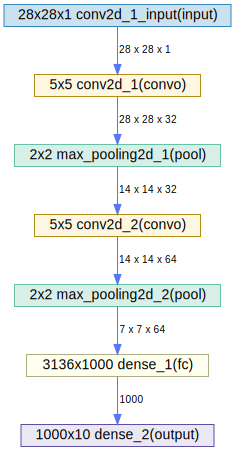

In [9]:
model1.plot_network()